In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import streamlit as st

## Loading DataSet

In [ ]:
df = pd.read_csv("HRDataset.csv")
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

## Data Preprocessing

In [ ]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [ ]:
date_columns = ['DOB','DateofTermination', 'LastPerformanceReview_Date']
for i in date_columns:
    df[i] = pd.to_datetime(df[i])

In [ ]:
df['DateofHire'] = pd.to_datetime(df['DateofHire'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   Salary                      311 non-null    int64         
 3   Position                    311 non-null    object        
 4   State                       311 non-null    object        
 5   Zip                         311 non-null    int64         
 6   DOB                         311 non-null    datetime64[ns]
 7   Sex                         311 non-null    object        
 8   MaritalDesc                 311 non-null    object        
 9   CitizenDesc                 311 non-null    object        
 10  HispanicLatino              311 non-null    object        
 11  RaceDesc                    311 non-null    object        

In [ ]:
df.drop(columns=['MarriedID', 'MaritalStatusID', 'GenderID','EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID','PositionID','ManagerID','Termd'],inplace= True)

In [ ]:
df.head()

,Employee_Name,EmpID,Salary,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,...,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,62506,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,...,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,"Ait Sidi, Karthikeyan",10084,104437,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,...,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,"Akinkuolie, Sarah",10196,64955,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,...,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,"Alagbe,Trina",10088,64991,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,...,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,"Anderson, Carol",10069,50825,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,...,Production,Webster Butler,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2


In [ ]:
df.describe().round(2)

,EmpID,Salary,Zip,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.00,311.00,311.00,311.00,311.00,311.00,311.00,311.00
mean,10156.00,69020.68,6555.48,4.11,3.89,1.22,0.41,10.24
std,89.92,25156.64,16908.40,0.79,0.91,2.35,1.29,5.85
min,10001.00,45046.00,1013.00,1.12,1.00,0.00,0.00,1.00
25%,10078.50,55501.50,1901.50,3.69,3.00,0.00,0.00,5.00
50%,10156.00,62810.00,2132.00,4.28,4.00,0.00,0.00,10.00
75%,10233.50,72036.00,2355.00,4.70,5.00,0.00,0.00,15.00
max,10311.00,250000.00,98052.00,5.00,5.00,8.00,6.00,20.00


## Data Visualization

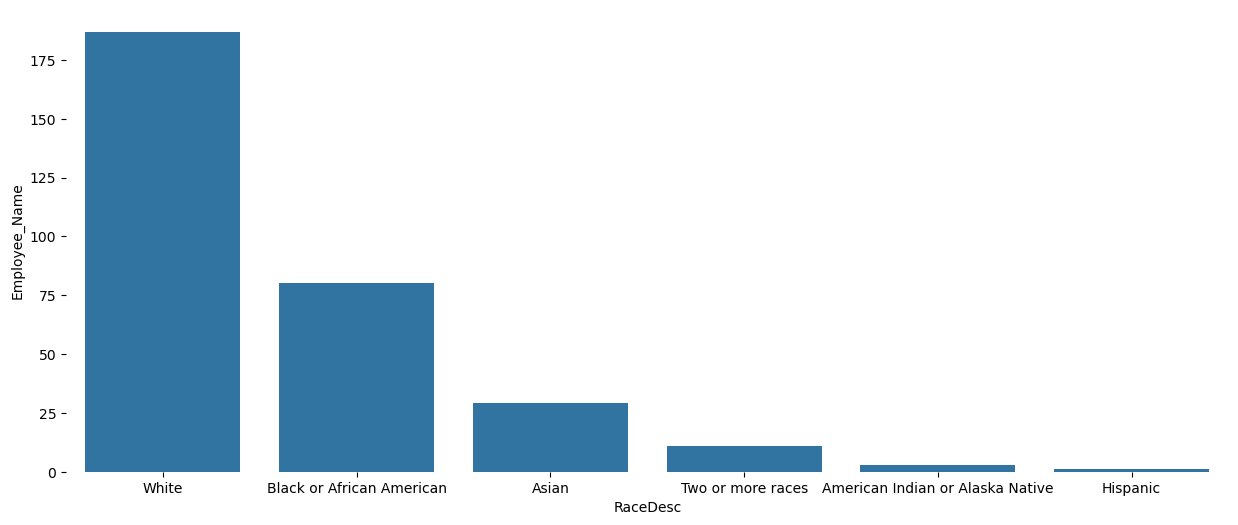

In [ ]:
num_of_emp_per_Race = df.groupby('RaceDesc')['Employee_Name'].count().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(num_of_emp_per_Race, x='RaceDesc', y='Employee_Name')
sns.despine(left=True,bottom=True)

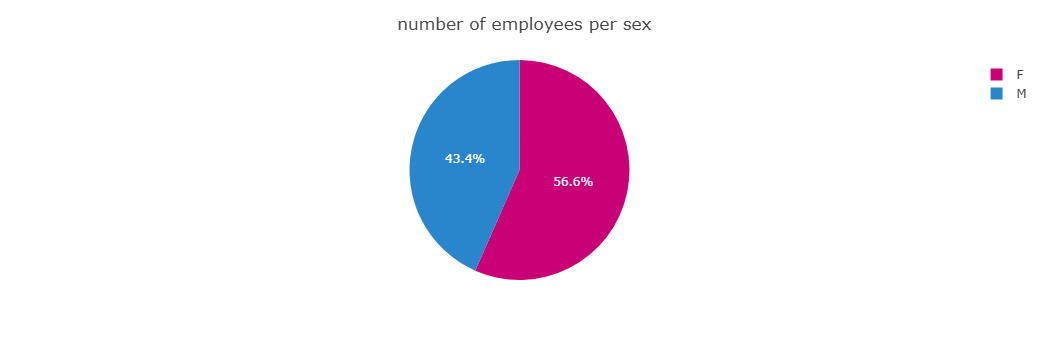

In [ ]:
num_of_emp_per_sex = df.groupby('Sex')['Employee_Name'].count().reset_index(name='Employee_count')
fig01 = px.pie(num_of_emp_per_sex,names='Sex',values='Employee_count')
fig01.update_traces(marker=dict(colors=['#c90076', '#2986cc']))
fig01.update_layout(title_text='number of employees per sex')

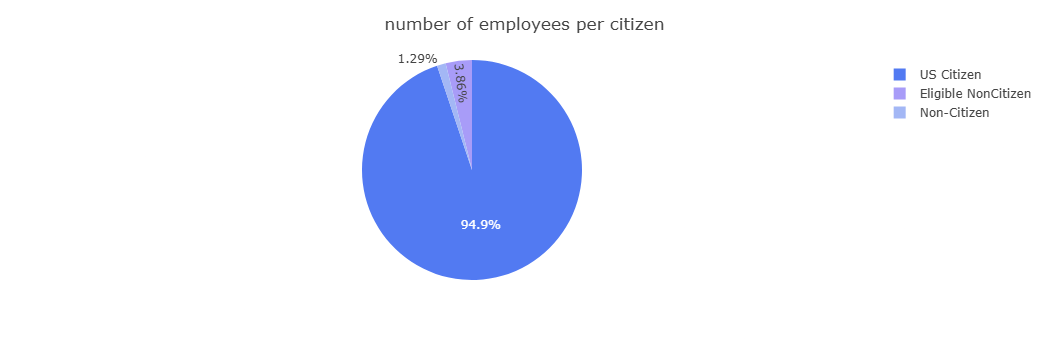

In [ ]:
num_of_emp_per_Citizen = df.groupby('CitizenDesc')['Employee_Name'].count().reset_index(name='Employee_count')
fig02 = px.pie(num_of_emp_per_Citizen,names='CitizenDesc',values='Employee_count')
fig02.update_traces(marker=dict(colors=['#A89CF8', '#A3B7F5', '#527AF2']))
fig02.update_layout(title_text='number of employees per citizen')

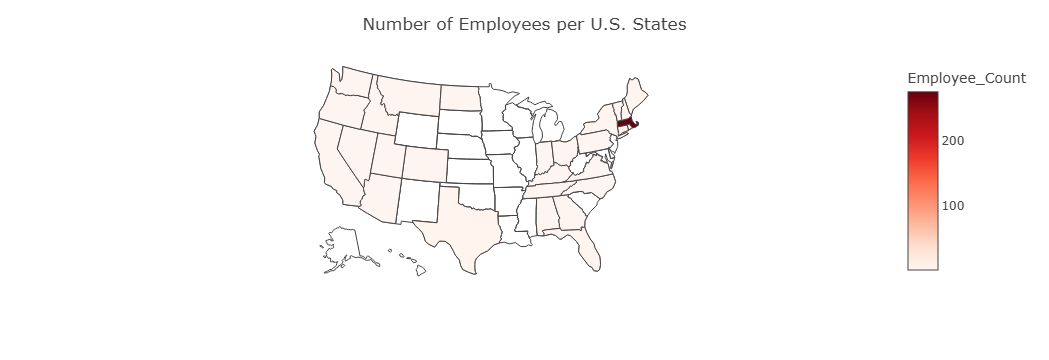

In [648]:
df_state = df.groupby('State')['Employee_Name'].count().reset_index(name='Employee_Count')
fig03 = px.choropleth(
    df_state,
    locations='State',          
    locationmode='USA-states',    
    color='Employee_Count',     
    color_continuous_scale='reds',
    scope='usa'
)


fig03.update_layout(title_text='Number of Employees per U.S. States')


In [ ]:
df['year_of_Hire'] = df['DateofHire'].dt.year

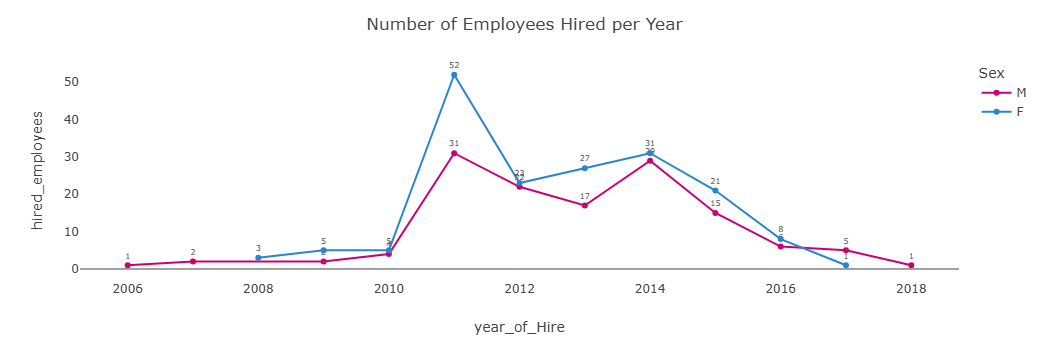

In [ ]:
hired_emp_per_year =  df.groupby(['year_of_Hire','Sex'])['Employee_Name'].count().reset_index(name='hired_employees')
fig04 = px.line(hired_emp_per_year,x='year_of_Hire',y='hired_employees',color='Sex',color_discrete_sequence=['#c90076', '#2986cc'],markers=True,text='hired_employees')
fig04.update_traces(
    textposition='top center',
    textfont_size=8
)
fig04.update_layout(title_text='Number of Employees Hired per Year',xaxis=dict(showgrid=False),yaxis=dict(showgrid=False))

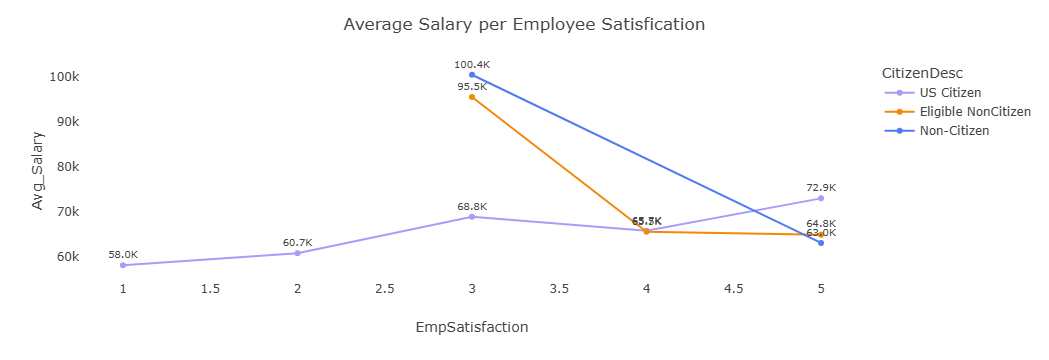

In [ ]:
Avg_Salary=df.groupby(['EmpSatisfaction','CitizenDesc'])['Salary'].mean().reset_index(name='Avg_Salary')
Avg_Salary['Avg_Salary_K'] = (Avg_Salary['Avg_Salary'] / 1000).round(1).astype(str) + 'K'
fig05 = px.line(Avg_Salary,x='EmpSatisfaction',y='Avg_Salary',color_discrete_sequence=['#A89CF8', '#F28907', '#527AF2'],text='Avg_Salary_K',markers=True,color='CitizenDesc')
fig05.update_traces(textposition='top center',
                   textfont_size=10)
fig05.update_layout(title_text='Average Salary per Employee Satisfication',xaxis=dict(showgrid=False),yaxis=dict(showgrid=False))

In [ ]:
conditions = [
    (df['Salary'] >=30000) & (df['Salary']<40000),
    (df['Salary'] >=40000) & (df['Salary']<50000),
    (df['Salary'] >=50000) & (df['Salary']<60000),
    (df['Salary'] >=60000) & (df['Salary']<70000),
    (df['Salary'] >=70000) 
]
choices=['30-40K','40-50K','50-60K','60-70K','+70K']

df['Range']= np.select(conditions,choices)

In [ ]:
df['Range']

0      60-70K
1        +70K
2      60-70K
3      60-70K
4      50-60K
        ...  
306    60-70K
307    40-50K
308      +70K
309      +70K
310    40-50K
Name: Range, Length: 311, dtype: object

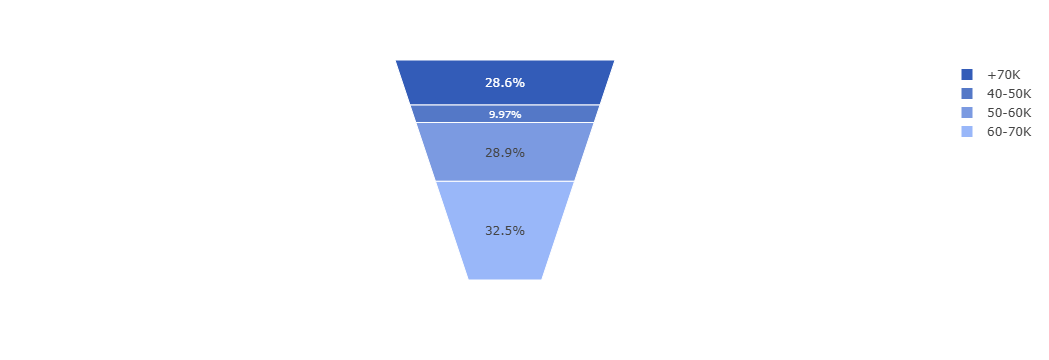

In [650]:
conditions = [
    (df['Salary'] >=30000) & (df['Salary']<40000),
    (df['Salary'] >=40000) & (df['Salary']<50000),
    (df['Salary'] >=50000) & (df['Salary']<60000),
    (df['Salary'] >=60000) & (df['Salary']<70000),
    (df['Salary'] >=70000) 
]
choices=['30-40K','40-50K','50-60K','60-70K','+70K']

df['Range']= np.select(conditions,choices)
num_of_Employee_by_rangeOfSalaries = df.groupby(['Range'])['Employee_Name'].count().reset_index(name='num_of_Employee')
px.funnel_area(num_of_Employee_by_rangeOfSalaries,names='Range',values='num_of_Employee', color_discrete_sequence = ['#335CB8','#5478C7','#7B9AE1','#99B7F9'])

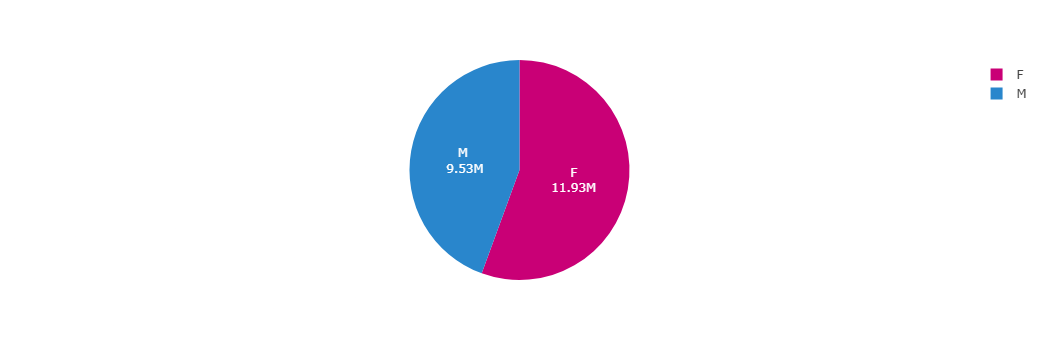

In [ ]:
salary_per_sex = df.groupby('Sex')['Salary'].sum().reset_index(name='Sum_Salary')
salary_per_sex['Sum_Salary_M'] = (salary_per_sex['Sum_Salary'] / 1000000).round(2).astype('string')+'M'
fig06 =px.pie(salary_per_sex,names='Sex',values='Sum_Salary',color_discrete_sequence=['#c90076', '#2986cc'])
fig06.update_traces(text=salary_per_sex['Sum_Salary_M'],textinfo='label+text')